# Project Title
---

Group Name

Team members:
- Maryam Mohamed
- Zahraa Mohamed 


## Introduction 📝
__Introduction to the topic__ 

Economic growth and human well-being are deeply connected. Income levels often shape access to healthcare, education, and living standards, which in turn influence how long people live. By exploring the link between GNI per capita and life expectancy, we can uncover valuable insights into global development.

## Problem Statement ❗

Despite global progress, not all countries experience equal improvements in health and wealth. Some nations achieve high income without a proportional rise in life expectancy, while others manage to improve health outcomes despite lower income levels. Understanding this relationship is crucial for identifying gaps and opportunities in development.

## Objectives: 🎯
__Questions that will guide the analysis to solve the problem__

- Analyze the relationship between GNI per capita and life expectancy across countries.

- Identify patterns and outliers where income does not match expected health outcomes.

- Highlight regional and global trends over time.

- Provide visual insights that make the link between economic growth and human well-being easy to understand for a non-technical audience.

## Exploratory Data Analysis (EDA):

### Data Info:
__Getting the data and exploring it (includes descriptive statistics)__

In [86]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# ---------- Load
gni = pd.read_csv("data/gni_per_cap_atlas_method_con2021.csv")
life = pd.read_csv("data/life_expectancy.csv")


In [ ]:
# Preview first rows
display(gni.head())
display(life.head())

In [ ]:
# Check a specific country (example: Andorra)
life[life['country'] == 'Andorra']

In [ ]:
# Data types
display(pd.DataFrame(gni.dtypes, columns=['DataType']))
display(pd.DataFrame(life.dtypes, columns=['DataType']))

In [ ]:
# Info about datasets
display(gni.info())
display(life.info())

In [ ]:
# Shapes of datasets
print("GNI shape:", gni.shape)
print("Life Expectancy shape:", life.shape)

In [ ]:
# Columns
print("GNI columns:", gni.columns[1:])

In [ ]:
# Descriptive statistics
display(gni.describe())
display(life.describe())

### Data Handling: 
__Cleaning, transforming, and combining data__

__Function to clean numbers like 25k, 1.2M, 3b into floats__

In [99]:
print(gni.head(), "\n")

def clean_number(value):
    if isinstance(value, str):      
        value = value.strip().lower() 
        value = value.replace(",", "") 
        if value.endswith("k"):        
            return float(value[:-1]) * 1000
        elif value.endswith("m"):    
            return float(value[:-1]) * 1_000_000
        elif value.endswith("b"):     
            return float(value[:-1]) * 1_000_000_000
        else:
            try:
                return float(value)   
            except:
                return None
    return value   


                country   1800   1801   1802   1803   1804   1805   1806  \
0           Afghanistan 207.00 207.00 207.00 207.00 207.00 207.00 207.00   
1                Angola 517.00 519.00 522.00 524.00 525.00 528.00 531.00   
2               Albania 207.00 207.00 207.00 207.00 207.00 207.00 207.00   
3  United Arab Emirates 738.00 740.00 743.00 746.00 749.00 751.00 754.00   
4             Argentina 794.00 797.00 799.00 802.00 805.00 808.00 810.00   

    1807   1808  ...   2041   2042   2043   2044   2045   2046   2047   2048  \
0 207.00 207.00  ...    751    767    783    800    817    834    852    870   
1 533.00 536.00  ...   2770   2830   2890   2950   3010   3080   3140   3210   
2 207.00 207.00  ...   9610   9820    10k  10.2k  10.5k  10.7k  10.9k  11.1k   
3 757.00 760.00  ...  47.9k  48.9k    50k    51k  52.1k  53.2k  54.3k  55.5k   
4 813.00 816.00  ...  12.8k  13.1k  13.4k  13.6k  13.9k  14.2k  14.5k  14.8k   

    2049   2050  
0    888    907  
1   3280   3340  
2  11.4k

In [100]:
print(clean_number(None))

None


__Apply cleaning to all columns except "country"__

In [101]:
columns = gni.columns[1:]
for col in columns:
    gni[col] = gni[col].apply(clean_number)

In [102]:
life[life['country'] == 'Andorra']

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
YEAR = ["1800", "2025"]

print("After cleaning:")
print(life[["country"]+YEAR].head(), "\n")
print(gni[["country"]+YEAR].head(), "\n")


After cleaning:
                country  1800  2025
0           Afghanistan 28.20 65.20
1                Angola 27.00 67.10
2               Albania 35.40 79.20
3               Andorra   NaN   NaN
4  United Arab Emirates 30.70 74.70 

                country   1800     2025
0           Afghanistan 207.00   548.00
1                Angola 517.00  2120.00
2               Albania 207.00  6390.00
3  United Arab Emirates 738.00 38700.00
4             Argentina 794.00  9880.00 



In [104]:
life[life['2020'].isna()]['country']

3                  Andorra
46                Dominica
93     St. Kitts and Nevis
107                 Monaco
112       Marshall Islands
131                  Nauru
138                  Palau
156             San Marino
178                 Tuvalu
Name: country, dtype: object

In [105]:
YEARS = [str(year) for year in range(1900, 2026)]
life_sel = life[["country"] + YEARS]

life_sel = life[["country"] + YEARS]
gni_sel  = gni[["country"] + YEARS]

life_long = life_sel.melt(id_vars="country", value_vars=YEARS,
                          var_name="year", value_name="life_expectancy")
gni_long  = gni_sel.melt(id_vars="country", value_vars=YEARS,
                         var_name="year", value_name="gni_per_capita")

df_long = pd.merge(life_long, gni_long, on=["country","year"]).dropna()
df_long

,country,year,life_expectancy,gni_per_capita
0,Afghanistan,1900,33.30,320.00
1,Angola,1900,32.60,576.00
2,Albania,1900,34.90,348.00
3,United Arab Emirates,1900,35.40,2160.00
4,Argentina,1900,37.20,2450.00
...,...,...,...,...
23935,Samoa,2025,71.20,3970.00
23936,Yemen,2025,68.40,969.00
23937,South Africa,2025,66.50,6100.00
23938,Zambia,2025,64.70,1060.00


In [106]:
# Drop missing and filter unrealistic values
df_long = df_long.dropna()
df_long = df_long[df_long["gni_per_capita"] > 0]

print("After cleaning:", df_long.shape)
print(df_long.head())


After cleaning: (23604, 4)
                country  year  life_expectancy  gni_per_capita
0           Afghanistan  1900            33.30          320.00
1                Angola  1900            32.60          576.00
2               Albania  1900            34.90          348.00
3  United Arab Emirates  1900            35.40         2160.00
4             Argentina  1900            37.20         2450.00


In [107]:
print("Final dataset shape:", df_long.shape)
print(df_long.head())

Final dataset shape: (23604, 4)
                country  year  life_expectancy  gni_per_capita
0           Afghanistan  1900            33.30          320.00
1                Angola  1900            32.60          576.00
2               Albania  1900            34.90          348.00
3  United Arab Emirates  1900            35.40         2160.00
4             Argentina  1900            37.20         2450.00


In [108]:
display(gni.isnull().sum())
display(life.isnull().sum())

country    0
1800       1
1801       1
1802       1
1803       1
          ..
2046       1
2047       1
2048       1
2049       1
2050       1
Length: 252, dtype: int64

country    0
1800       9
1801       9
1802       9
1803       9
          ..
2096       9
2097       9
2098       9
2099       9
2100       9
Length: 302, dtype: int64

In [109]:
display(gni.isnull().mean()*100)
display(life.isnull().mean()*100)

country   0.00
1800      0.52
1801      0.52
1802      0.52
1803      0.52
          ... 
2046      0.52
2047      0.52
2048      0.52
2049      0.52
2050      0.52
Length: 252, dtype: float64

country   0.00
1800      4.62
1801      4.62
1802      4.62
1803      4.62
          ... 
2096      4.62
2097      4.62
2098      4.62
2099      4.62
2100      4.62
Length: 302, dtype: float64

In [110]:
gni = gni.dropna()
life = life.dropna()
gni.isnull().sum()

country    0
1800       0
1801       0
1802       0
1803       0
          ..
2046       0
2047       0
2048       0
2049       0
2050       0
Length: 252, dtype: int64

In [111]:
# Add continent to df_long 

import country_converter as coco

df_long["continent"] = coco.convert(names=df_long["country"], to="continent")
print(df_long.head(10))
print(df_long["continent"].value_counts())

                country  year  life_expectancy  gni_per_capita continent
0           Afghanistan  1900            33.30          320.00      Asia
1                Angola  1900            32.60          576.00    Africa
2               Albania  1900            34.90          348.00    Europe
3  United Arab Emirates  1900            35.40         2160.00      Asia
4             Argentina  1900            37.20         2450.00   America
5               Armenia  1900            35.90          191.00      Asia
6   Antigua and Barbuda  1900            33.70         1120.00   America
7             Australia  1900            50.00         6150.00   Oceania
8               Austria  1900            41.50         4970.00    Europe
9            Azerbaijan  1900            27.10           65.00      Asia
continent
Africa     6804
Asia       6048
Europe     4914
America    4298
Oceania    1540
Name: count, dtype: int64


### Analysis: 
__Answering the objectives through data analysis__



In [115]:
df = pd.read_csv(r"C:\Users\SP7\DSB_PT_1\DSB_projects\World-Development-Statistics\data\new_data.csv")

In [116]:
print(df.shape)
df.head()

(23604, 5)


,country,year,life_expectancy,gni_per_capita,continent
0,Afghanistan,1900,33.30,320.00,Asia
1,Angola,1900,32.60,576.00,Africa
2,Albania,1900,34.90,348.00,Europe
3,United Arab Emirates,1900,35.40,2160.00,Asia
4,Argentina,1900,37.20,2450.00,America


In [117]:
# Summary statistics
print(df[["gni_per_capita", "life_expectancy"]].describe())

       gni_per_capita  life_expectancy
count        23604.00         23604.00
mean          5893.56            54.36
std          11950.44            16.38
min             28.00             1.13
25%            576.00            38.80
50%           1440.00            55.90
75%           4820.00            69.20
max         117000.00            85.60


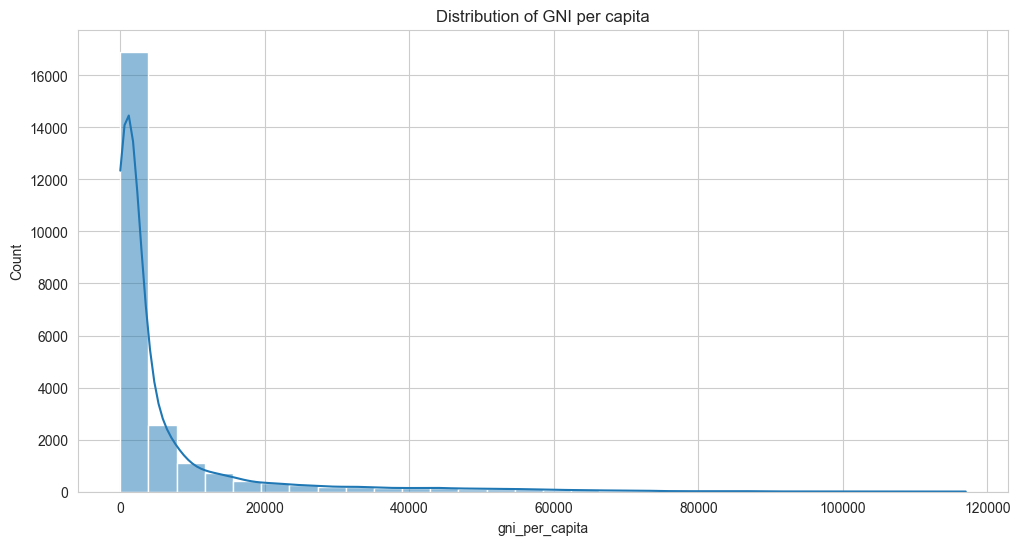

In [118]:
# Distribution plots
sns.histplot(df["gni_per_capita"], bins=30, kde=True)
plt.title("Distribution of GNI per capita")
plt.show()

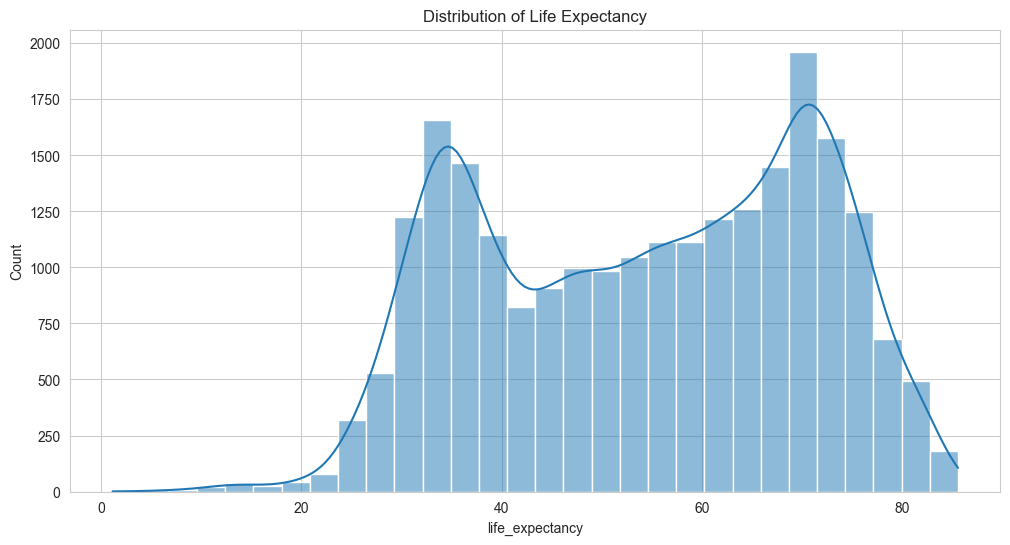

In [119]:
sns.histplot(df["life_expectancy"], bins=30, kde=True)
plt.title("Distribution of Life Expectancy")
plt.show()

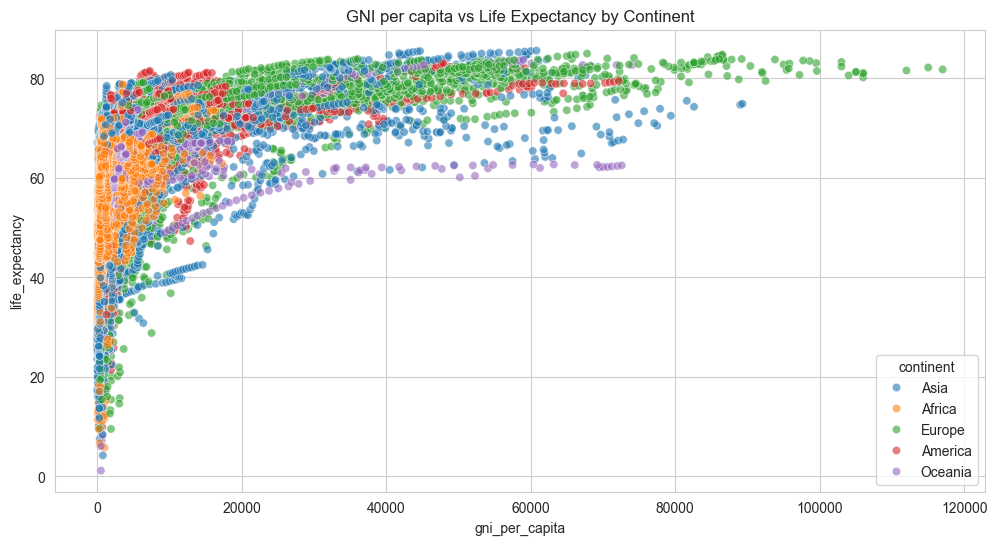

In [120]:
# Scatter plot by continent
sns.scatterplot(data=df, x="gni_per_capita", y="life_expectancy", hue="continent", alpha=0.6)
plt.title("GNI per capita vs Life Expectancy by Continent")
plt.show()

In [121]:
# Statistical Test: Pearson correlation
valid = df[["gni_per_capita", "life_expectancy"]].dropna()
r, p = stats.pearsonr(valid["gni_per_capita"], valid["life_expectancy"])
print(f"Correlation r: {r:.3f}, p-value: {p:.4g}")

Correlation r: 0.514, p-value: 0


In [122]:
q25 = df['gni_per_capita'].quantile(0.25)
q75 = df['gni_per_capita'].quantile(0.75)

low = df.loc[df['gni_per_capita'] <= q25, 'life_expectancy'].dropna()
high = df.loc[df['gni_per_capita'] >= q75, 'life_expectancy'].dropna()

# two-sample t-test
t, p = stats.ttest_ind(high, low, equal_var=False)
print(f"T-test High vs Low Income: t={t:.3f}, p-value={p:.4g}")


T-test High vs Low Income: t=174.097, p-value=0


In [123]:

# 1. Filter the dataset for a single year (e.g., 2021).
# 2. Re-run the correlation test.
# 3. Compare with the overall results.


# Example:
df_2021 = df[df["year"] == 2021]
r_2021, p_2021 = stats.pearsonr(df_2021["gni_per_capita"], df_2021["life_expectancy"])
print(f"2021 correlation r={r_2021:.3f}, p={p_2021:.4g}")

2021 correlation r=0.668, p=4.091e-25


C:\Users\SP7\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


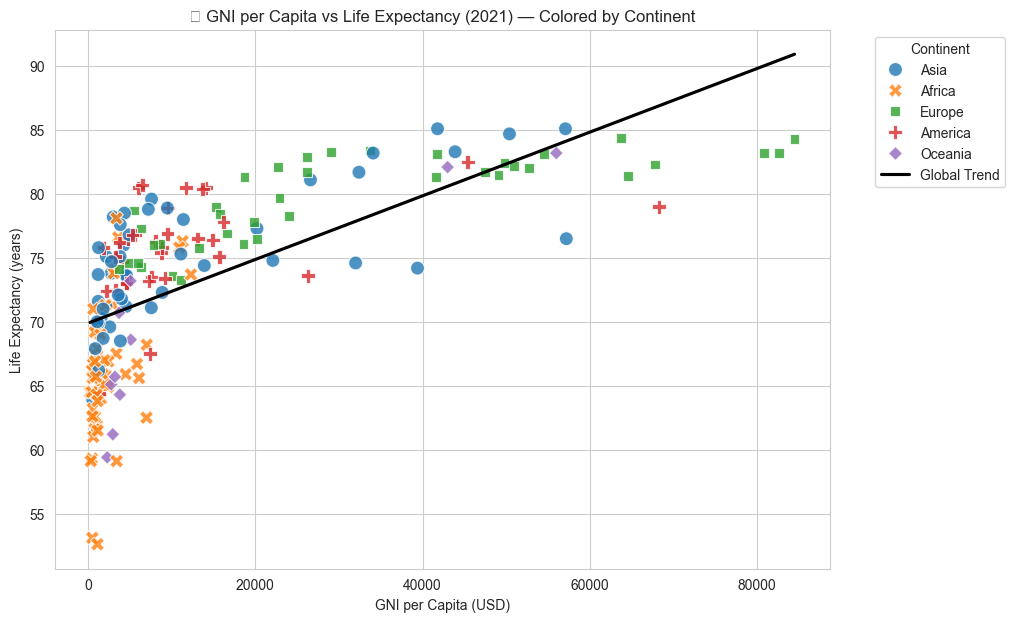

📈 Global Correlation between GNI and Life Expectancy (2021): 0.67


In [124]:

df_long['year'] = df_long['year'].astype(int)

# Use 2021 as the comparison year
latest = df_long[df_long['year']==2021].dropna(subset=['gni_per_capita', 'life_expectancy', 'continent'])

plt.figure(figsize=(10,7))
sns.scatterplot(
    data=latest,
    x='gni_per_capita',
    y='life_expectancy',
    hue='continent',
    style='continent',
    s=100,
    alpha=0.8
)
sns.regplot(
    data=latest, x='gni_per_capita', y='life_expectancy', scatter=False, color='black', ci=None, label="Global Trend"
)

plt.title("💸 GNI per Capita vs Life Expectancy (2021) — Colored by Continent")
plt.xlabel("GNI per Capita (USD)")
plt.ylabel("Life Expectancy (years)")
plt.legend(title="Continent", bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show()

# Correlation
corr = latest['gni_per_capita'].corr(latest['life_expectancy'])
print(f"📈 Global Correlation between GNI and Life Expectancy (2021): {corr:.2f}")


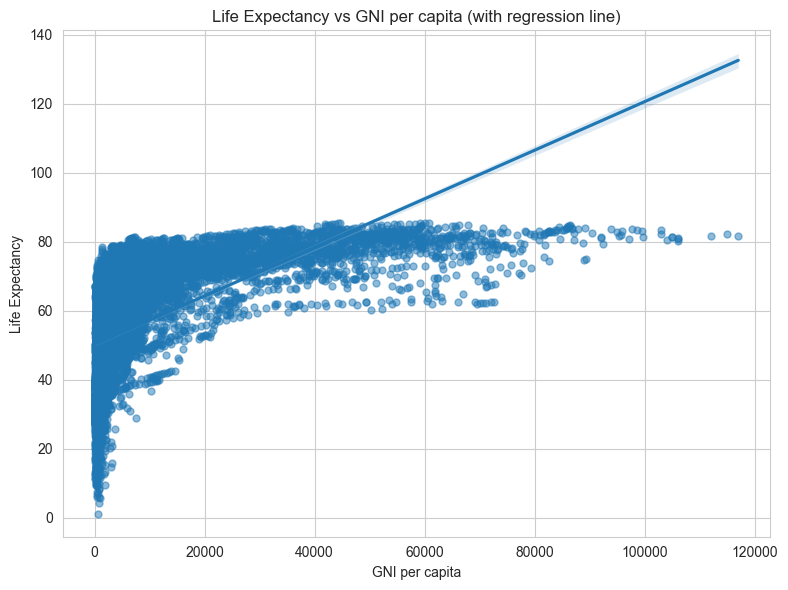


=== Top 10 above expected (positive residuals) ===


,country,year,gni_per_capita,life_expectancy,predicted_life,residual,residual_z
23578,Syria,2025,1330.00,78.50,51.15,27.35,1.95
23394,Syria,2024,1310.00,78.00,51.14,26.86,1.91
23498,Iran,2025,3140.00,78.90,52.42,26.48,1.88
23314,Iran,2024,3110.00,78.70,52.40,26.30,1.87
23210,Syria,2023,1280.00,77.40,51.11,26.29,1.87
23272,Colombia,2024,6560.00,81.10,54.83,26.27,1.87
23456,Colombia,2025,6760.00,81.20,54.98,26.22,1.87
23088,Colombia,2023,6380.00,80.90,54.71,26.19,1.86
23550,Peru,2025,7320.00,81.50,55.37,26.13,1.86
22904,Colombia,2022,6190.00,80.70,54.57,26.13,1.86



=== Bottom 10 below expected (negative residuals) ===


,country,year,gni_per_capita,life_expectancy,predicted_life,residual,residual_z
21297,Norway,2013,117000.00,81.80,132.65,-50.85,-3.62
3491,Samoa,1918,546.00,1.13,50.60,-49.47,-3.52
21487,Norway,2014,115000.00,82.20,131.24,-49.04,-3.49
21107,Norway,2012,112000.00,81.60,129.13,-47.53,-3.38
6158,Kazakhstan,1933,814.00,4.19,50.79,-46.60,-3.32
855,Namibia,1904,1030.00,5.77,50.94,-45.17,-3.21
20133,Luxembourg,2007,106000.00,80.20,124.90,-44.70,-3.18
3345,Cameroon,1918,742.00,6.07,50.74,-44.67,-3.18
3477,Tonga,1918,533.00,6.05,50.59,-44.54,-3.17
20347,Norway,2008,106000.00,80.90,124.90,-44.00,-3.13


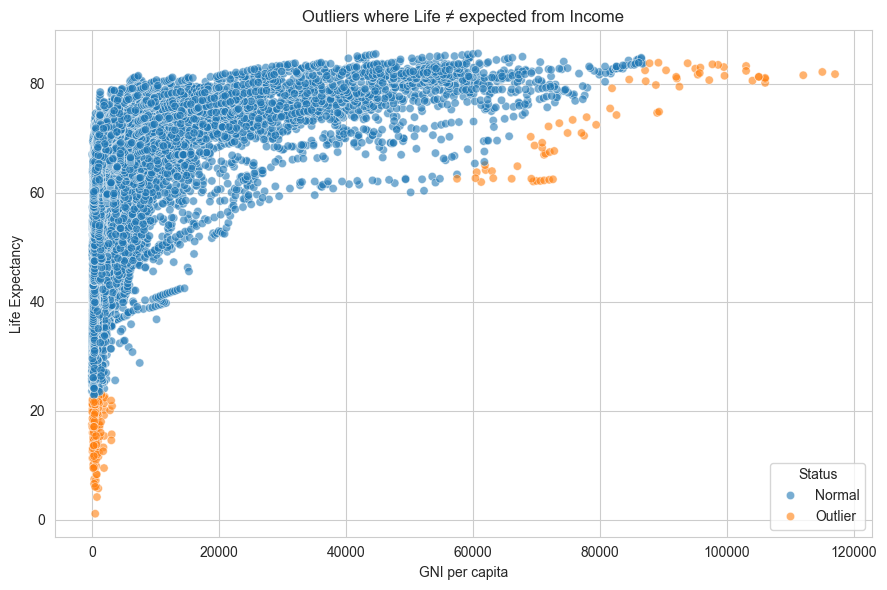

In [125]:
plt.figure(figsize=(8,6))
sns.regplot(
    data=df, 
    x="gni_per_capita", 
    y="life_expectancy", 
    scatter_kws={"alpha":0.5, "s":25})
plt.title("Life Expectancy vs GNI per capita (with regression line)")
plt.xlabel("GNI per capita")
plt.ylabel("Life Expectancy")
plt.tight_layout()
plt.show()

valid = df[["gni_per_capita","life_expectancy"]].dropna()
x = valid["gni_per_capita"].values
y = valid["life_expectancy"].values

slope, intercept = np.polyfit(x, y, deg=1)

df = df.copy()
df["predicted_life"] = intercept + slope * df["gni_per_capita"]
df["residual"] = df["life_expectancy"] - df["predicted_life"]

resid_mean = df["residual"].mean()
resid_std  = df["residual"].std(ddof=0)
df["residual_z"] = (df["residual"] - resid_mean) / (resid_std if resid_std != 0 else 1)

top_outliers = (df.sort_values("residual", ascending=False)
                  .head(10)[["country","year","gni_per_capita","life_expectancy","predicted_life","residual","residual_z"]])
bottom_outliers = (df.sort_values("residual", ascending=True)
                     .head(10)[["country","year","gni_per_capita","life_expectancy","predicted_life","residual","residual_z"]])

print("\n=== Top 10 above expected (positive residuals) ===")
display(top_outliers)

print("\n=== Bottom 10 below expected (negative residuals) ===")
display(bottom_outliers)

is_outlier = df["residual_z"].abs() >= 2

plt.figure(figsize=(9,6))
sns.scatterplot(
    data=df, x="gni_per_capita", y="life_expectancy",
    hue=is_outlier.map({True:"Outlier", False:"Normal"}),
    alpha=0.6)
plt.title("Outliers where Life ≠ expected from Income")
plt.xlabel("GNI per capita")
plt.ylabel("Life Expectancy")
plt.legend(title="Status")
plt.tight_layout()
plt.show()

C:\Users\SP7\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127793 (\N{SEEDLING}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


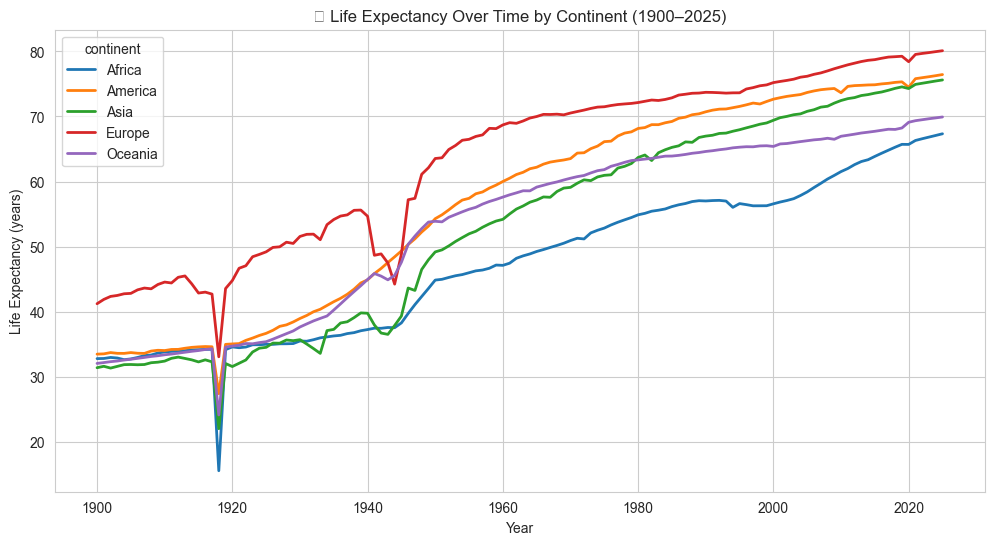

C:\Users\SP7\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


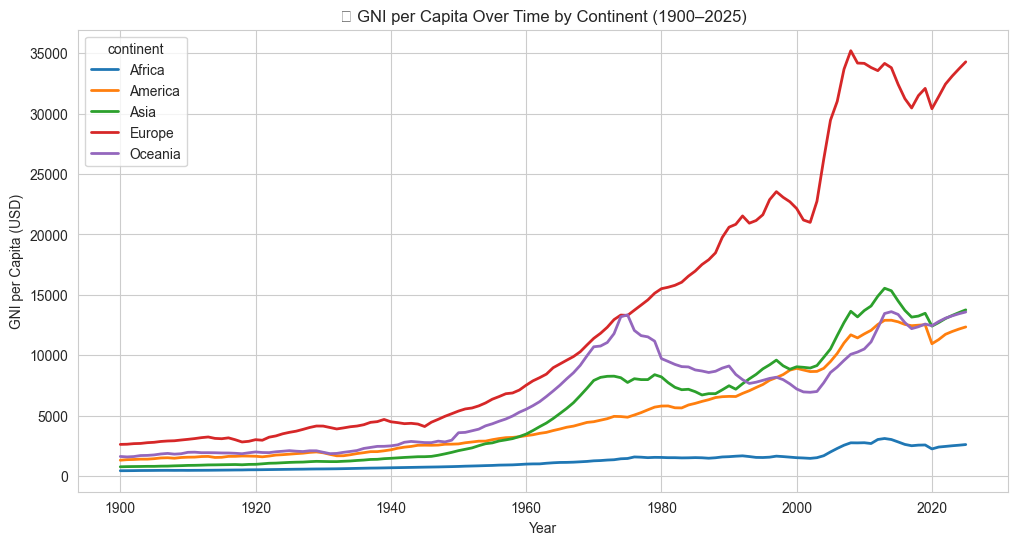

In [126]:
# Calculate continent-level averages
continent_trends = df_long.groupby(['continent', 'year'])[['gni_per_capita', 'life_expectancy']].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(
    data=continent_trends,
    x='year',
    y='life_expectancy',
    hue='continent',
    linewidth=2
)
plt.title("🌱 Life Expectancy Over Time by Continent (1900–2025)")
plt.ylabel("Life Expectancy (years)")
plt.xlabel("Year")
plt.grid(True)
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(
    data=continent_trends,
    x='year',
    y='gni_per_capita',
    hue='continent',
    linewidth=2
)
plt.title("💰 GNI per Capita Over Time by Continent (1900–2025)")
plt.ylabel("GNI per Capita (USD)")
plt.xlabel("Year")
plt.grid(True)
plt.show()

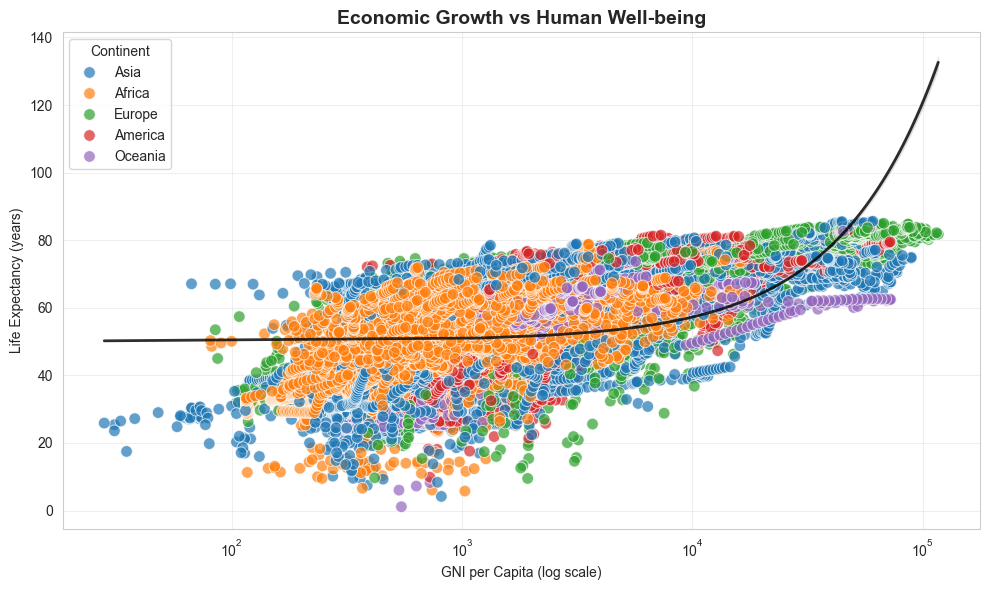

In [129]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="gni_per_capita", y="life_expectancy", hue="continent", alpha=0.7, s=70)
sns.regplot(data=df, x="gni_per_capita", y="life_expectancy", scatter=False, color="black", line_kws={"linewidth":2, "alpha":0.8})
plt.title("Economic Growth vs Human Well-being", fontsize=14, fontweight="bold")
plt.xlabel("GNI per Capita (log scale)")
plt.ylabel("Life Expectancy (years)")
plt.xscale("log")
plt.legend(title="Continent")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

---

## Summary
__Summarizing the key insights from the analysis__

* **Income distribution is highly skewed**:
  Most countries fall in the lower GNI per capita range, with only a few very high-income countries.

* **Life expectancy shows a more balanced spread**:
  Many countries cluster around 30–40 years (historically) and another large group around 70–80 years (recent years).

* **Strong positive relationship between GNI and life expectancy**:
  Countries with higher income generally enjoy longer life expectancy, but the relationship flattens at very high income levels.

* **Regional disparities are evident**:

  * Europe and America cluster at the top (high income + high life expectancy).
  * Africa shows the lowest values for both income and life expectancy.
  * Asia and Oceania show mixed performance.

* **Outliers highlight mismatches**:

  * Some wealthy countries (e.g., oil-rich nations) have lower life expectancy than expected.
  * Some middle-income countries (e.g., Cuba, Colombia) achieve higher life expectancy than predicted.

* **Trends over time (1900–2025)**:

  * Life expectancy has improved significantly across all continents.
  * GNI has also grown, but unevenly—Europe and America surged far ahead, while Africa lags behind.
  * The 1918 dip in life expectancy reflects the global influenza pandemic.

* **Takeaway for policymakers**:
  Economic growth is important, but not sufficient on its own—healthcare systems, education, and governance also play a key role in improving well-being.


## Recommendations / Conclusion

* **Invest in health and education**: Strengthening healthcare and education can significantly improve life expectancy, even without major income growth.
* **Address regional disparities**: Africa in particular requires stronger infrastructure and basic services to reduce the global gap.
* **Balance growth and well-being**: Higher income alone does not guarantee longer life; equitable access to resources and services is essential.
* **Learn from outliers**: Countries that perform better than expected offer models that can be adapted elsewhere.
* **Focus on sustainability**: Future policies should link economic growth with social equity to ensure long-term well-being.
